In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup

Balanza comercial España. Importaciones. Exportaciones.

In [2]:
r = requests.get('https://datosmacro.expansion.com/comercio/balanza/espana')
html = r.content
soup = BeautifulSoup(html, 'html.parser')
soup.prettify
soup.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_table = soup.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfbalanza_españa = pd.read_html(html_table.prettify())[0]

In [3]:
rex = requests.get('https://datosmacro.expansion.com/comercio/exportaciones/espana')
htmlex = rex.content
soupex = BeautifulSoup(htmlex, 'html.parser')
soupex.prettify
soupex.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tableex = soupex.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfexpor_españa = pd.read_html(html_tableex.prettify())[0]

In [4]:
ri = requests.get('https://datosmacro.expansion.com/comercio/importaciones/espana')
htmli = ri.content
soupi = BeautifulSoup(htmli, 'html.parser')
soupi.prettify
soupi.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tablei = soupi.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfimpor_españa = pd.read_html(html_tablei.prettify())[0]

In [5]:
dfim_ex = dfimpor_españa.join(dfexpor_españa.set_index('Fecha'), on='Fecha', how='outer')
dfespaña=dfim_ex.join(dfbalanza_españa.set_index('Fecha'), on='Fecha', how='outer')

In [6]:
dfespaña['Países']=dfespaña['Importaciones.1']
dfespaña['Países'] = dfespaña['Países'].apply(lambda x: 'España' if x!='España' else 'España')

dfespaña2=dfespaña.head(34)


DATOS ALEMANIA. BALANZA, EXPORTACIONES E IMPORTACIONES

In [7]:
rale = requests.get('https://datosmacro.expansion.com/comercio/balanza/alemania')
htmlale = rale.content
soupale = BeautifulSoup(htmlale, 'html.parser')
soupale.prettify
soupale.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tableale = soupale.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfibalanzaale = pd.read_html(html_tableale.prettify())[0]

In [8]:
ralee = requests.get('https://datosmacro.expansion.com/comercio/exportaciones/alemania')
htmlalee = ralee.content
soupalee = BeautifulSoup(htmlalee, 'html.parser')
soupalee.prettify
soupalee.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tablealee = soupalee.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfiexportacionesale = pd.read_html(html_tablealee.prettify())[0]

In [9]:
ralei = requests.get('https://datosmacro.expansion.com/comercio/importaciones/alemania')
htmlalei = ralei.content
soupalei = BeautifulSoup(htmlalei, 'html.parser')
soupalei.prettify
soupalei.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tablealei = soupalei.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfiimportacionesale = pd.read_html(html_tablealei.prettify())[0]

In [10]:
dfaleimexpo = dfiimportacionesale.join(dfiexportacionesale.set_index('Fecha'), on='Fecha', how='outer')
dfalebalan = dfaleimexpo.join(dfibalanzaale.set_index('Fecha'), on='Fecha', how='outer')
dfalebalan['Países']=dfalebalan['Importaciones.1']
dfalebalan['Países'] = dfalebalan['Países'].apply(lambda x: 'Alemania' if x!='Alemania' else 'Alemania')
dfalemania2=dfalebalan.head(34)

DATOS ITALIA. BALANZA, EXPORTACIONES E IMPORTACIONES

In [11]:
ruebalance = requests.get('https://datosmacro.expansion.com/comercio/balanza/italia')
htmlue = ruebalance.content
soupalue = BeautifulSoup(htmlue, 'html.parser')
soupalue.prettify
soupalue.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tableue = soupalue.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfue = pd.read_html(html_tableue.prettify())[0]
dfue = dfue.drop('Balanza comercial.1', axis=1)

In [12]:
raleit = requests.get('https://datosmacro.expansion.com/comercio/exportaciones/italia')
htmleit = raleit.content
soupeit = BeautifulSoup(htmleit, 'html.parser')
soupeit.prettify
soupeit.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tableeit = soupeit.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfiexportacionesit = pd.read_html(html_tableeit.prettify())[0]

In [13]:
raliit = requests.get('https://datosmacro.expansion.com/comercio/importaciones/italia')
htmliit = raliit.content
soupiit = BeautifulSoup(htmliit, 'html.parser')
soupiit.prettify
soupiit.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})
html_tableiit = soupiit.find_all('table', attrs={'class': 'table tabledat table-striped table-condensed table-hover'})[0]
dfiimportacionesit = pd.read_html(html_tableiit.prettify())[0]

In [14]:
dfaleimexpo = dfiimportacionesale.join(dfiexportacionesale.set_index('Fecha'), on='Fecha', how='outer')
dfalebalan = dfaleimexpo.join(dfibalanzaale.set_index('Fecha'), on='Fecha', how='outer')

dfitaie = dfiexportacionesit.join(dfue.set_index('Fecha'), on='Fecha', how='outer')
dfita = dfitaie.join(dfiimportacionesit.set_index('Fecha'), on='Fecha', how='outer')
dfita['Países']=dfita['Importaciones.1']
dfita['Países'] = dfita['Países'].apply(lambda x: 'Italia' if x!='Italia' else 'Italia')
dfita2=dfita.head(34)

UNIÓN DE LOS 3 DATAFRAME. Primeramente se eliminan y se homogenizan las tablas

In [15]:
dfgeneral2 = pd.concat([dfespaña2, dfalemania2,dfita2])
dfgeneral3=  dfgeneral2.sort_values(by='Fecha',ascending=False)

In [16]:
dfgeneral3.drop('Importaciones % PIB', axis=1,inplace=True)
dfgeneral3.drop('Exportaciones %PIB', axis=1,inplace=True)
dfgeneral3.drop('Importaciones.1', axis=1,inplace=True)
dfgeneral3.drop('Balanza comercial % PIB', axis=1,inplace=True)
dfgeneral3.drop('Exportaciones.1', axis=1,inplace=True)
dfgeneral3.drop('Balanza comercial.1', axis=1,inplace=True)

dfgeneral3['Importaciones']=dfgeneral3['Importaciones'].str.replace("M€","")
dfgeneral3['Importaciones']=dfgeneral3['Importaciones'].str.replace(".","")
dfgeneral3['Importaciones']=dfgeneral3['Importaciones'].str.replace(",",".")
dfgeneral3['Importaciones']=dfgeneral3['Importaciones'].astype(float, errors='ignore')


dfgeneral3['Exportaciones']=dfgeneral3['Exportaciones'].str.replace("M€","")
dfgeneral3['Exportaciones']=dfgeneral3['Exportaciones'].str.replace(".","")
dfgeneral3['Exportaciones']=dfgeneral3['Exportaciones'].str.replace(",",".")
dfgeneral3['Exportaciones']=dfgeneral3['Exportaciones'].astype(float, errors='ignore')

dfgeneral3['Balanza comercial']=dfgeneral3['Balanza comercial'].str.replace("M€","")
dfgeneral3['Balanza comercial']=dfgeneral3['Balanza comercial'].str.replace(".","")
dfgeneral3['Balanza comercial']=dfgeneral3['Balanza comercial'].str.replace(",",".")
dfgeneral3['Balanza comercial']=dfgeneral3['Balanza comercial'].astype(float, errors='ignore')


Se organizan las columnas ya unificadas con la información correspondiente.

In [26]:
columnas=list(dfgeneral3)
columnas
columnas[0],columnas[2],columnas[3],columnas[5],columnas[4],columnas[1]=columnas[0],columnas[1],columnas[2],columnas[3],columnas[4],columnas[5]
columnas
dftotal=dfgeneral3[columnas]

GRÁFICO SOBRE LA EVOLUCIÓN DE LAS IMPORTACIONES Y EXPORTACIONES

C:\Users\USR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


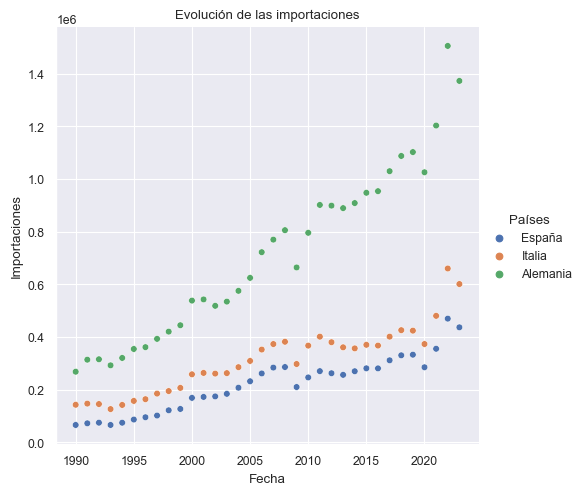

In [20]:
sns.set_theme(style='darkgrid', context='paper')
dftotalimpor=sns.relplot(data=dftotal, x='Fecha', y='Importaciones', hue='Países')
#,height= 6 ,aspect=1.5
dftotalimpor.set(title='Evolución de las importaciones')
#dftotal.set_ylabels('Años')
#dftotal.set_xlabels('Millones de €')
plt.show()

C:\Users\USR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


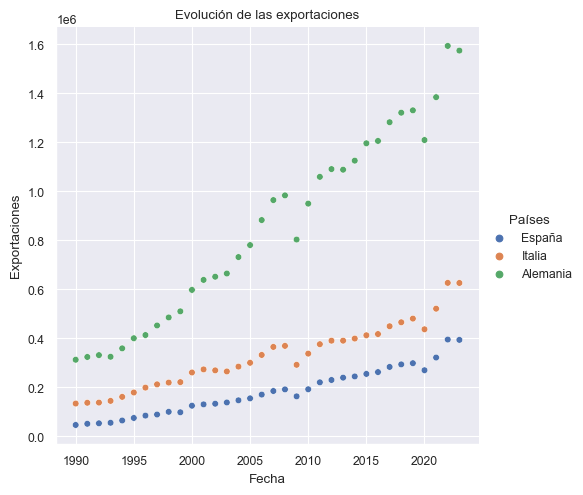

In [21]:
sns.set_theme(style='darkgrid', context='paper')
dftotalexpor=sns.relplot(data=dftotal, x='Fecha', y='Exportaciones', hue='Países')
#,height= 6 ,aspect=1.5
dftotalexpor.set(title='Evolución de las exportaciones')
#dftotal.set_ylabels('Años')
#dftotal.set_xlabels('Millones de €')
plt.show()

<Figure size 1000x600 with 0 Axes>

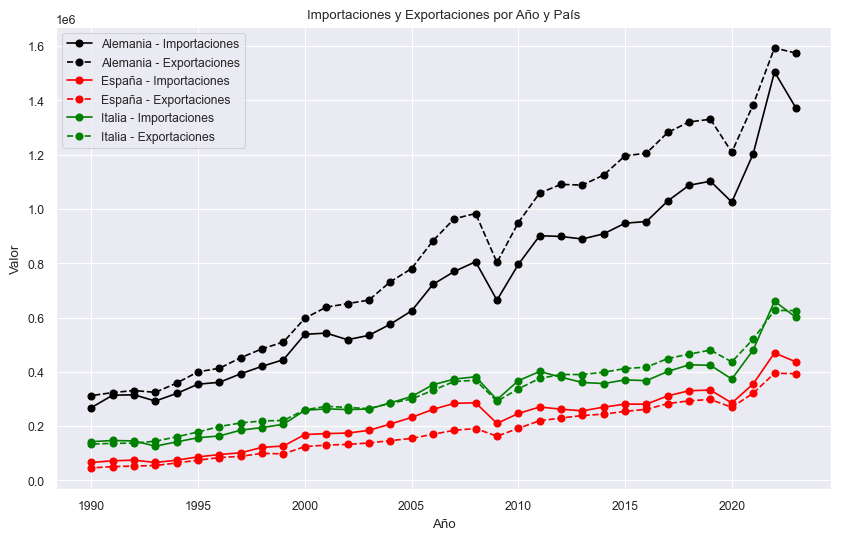

In [22]:
# Configurar colores y estilos de línea para cada país
colores = {'España': 'red', 'Italia': 'green', 'Alemania': 'black'}
estilos = {'Importaciones': '-', 'Exportaciones': '--'}

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada país
for pais, datos_pais in dftotal.groupby('Países'):
    # Iterar sobre cada tipo de operación (importación/exportación)
    for tipo_operacion in ['Importaciones', 'Exportaciones']:
        plt.plot(datos_pais['Fecha'], datos_pais[tipo_operacion],
                 label=f'{pais} - {tipo_operacion}', color=colores[pais], linestyle=estilos[tipo_operacion], marker='o')

plt.title('Importaciones y Exportaciones por Año y País')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

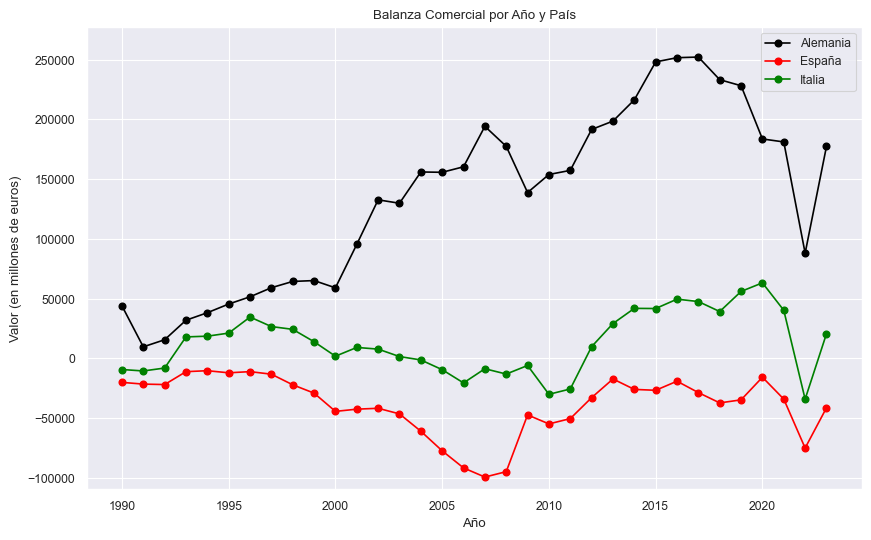

In [23]:
# Obtener los límites del eje Y
min_balanza = dftotal['Balanza comercial'].min()
max_balanza = dftotal['Balanza comercial'].max()

# Configurar colores y estilos de línea para cada país
colores = {'España': 'red', 'Italia': 'green', 'Alemania': 'black'}

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada país
for pais, datos_pais in dftotal.groupby('Países'):
    plt.plot(datos_pais['Fecha'], datos_pais['Balanza comercial'],
             label=f'{pais}', color=colores[pais], marker='o')

plt.title('Balanza Comercial por Año y País')
plt.xlabel('Año')
plt.ylabel('Valor (en millones de euros)')
plt.ylim(min_balanza * 1.1, max_balanza * 1.1)  # Ajustar límites del eje Y
plt.legend()
plt.grid(True)




# Mostrar el gráfico
plt.show()